In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator

%matplotlib inline

plt.style.use('default') 

sbn.set(style="whitegrid") 


In [3]:
trocafoneData = pd.read_csv('D:\DATOS\RELOADED\csv\events_up_to_01062018.csv',low_memory = False)

In [4]:
trocafoneData.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
trocafoneData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341681 entries, 0 to 2341680
Data columns (total 23 columns):
timestamp                   object
event                       object
person                      object
url                         object
sku                         float64
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtypes: float64(1), object(22)
memory usage: 410.9+ MB


In [7]:
trocafoneData['new_vs_returning'].value_counts()

Returning    165827
New           38242
Name: new_vs_returning, dtype: int64

In [8]:
trocafoneData['condition'].value_counts()

Bom                   547617
Excelente             378697
Muito Bom             359053
Bom - Sem Touch ID     31742
Novo                    3421
Name: condition, dtype: int64

In [9]:
#Creo columnas para poder utilizar la fecha y el horario mas comodamente
trocafoneData['date'] = pd.to_datetime(trocafoneData['timestamp']).dt.date
trocafoneData['time'] = pd.to_datetime(trocafoneData['timestamp']).dt.time
trocafoneData.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,00:11:59
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,00:11:27
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,00:11:16
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,00:11:14
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,00:11:09


In [10]:
#Veo si hay filas duplicadas con los mismos valores en todas las columnas
trocafoneData.duplicated().any()

False

In [11]:
timestamps_users = trocafoneData[['timestamp','event','person']]
timestamps_users.head()

,timestamp,event,person
0,2018-05-18 00:11:59,viewed product,4886f805
1,2018-05-18 00:11:27,viewed product,ad93850f
2,2018-05-18 00:11:16,viewed product,0297fc1e
3,2018-05-18 00:11:14,viewed product,2d681dd8
4,2018-05-18 00:11:09,viewed product,cccea85e


In [12]:
#Nuls en timestamp
trocafoneData['timestamp'].isnull().any()

False

## Estudio segun los productos y los eventos

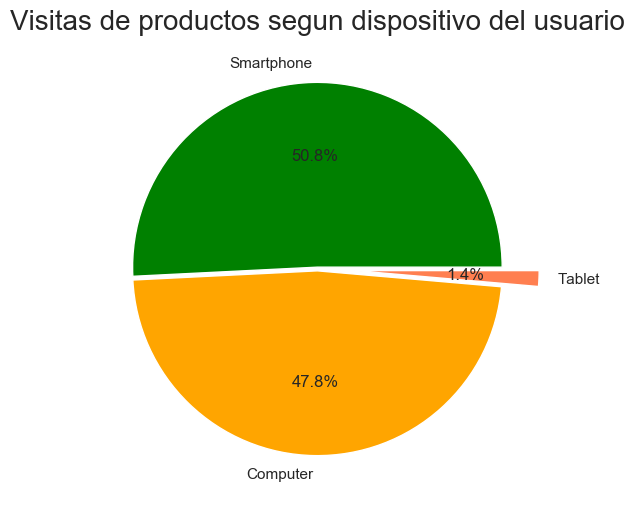

In [13]:
productos = trocafoneData[trocafoneData['device_type'] != 'Unknown']
productos = productos[productos['event'] == 'visited site']
plt.figure(figsize=(6, 6))
plt.title('Visitas de productos segun dispositivo del usuario', fontsize=20)
plt.pie(productos['device_type'].value_counts(), 
        labels=['Smartphone', 'Computer', 'Tablet'], autopct='%1.1f%%', 
        startangle=0, 
        colors=['green', 'orange', 'coral'], 
        explode=(0.01, 0.01, 0.2))
plt.show()



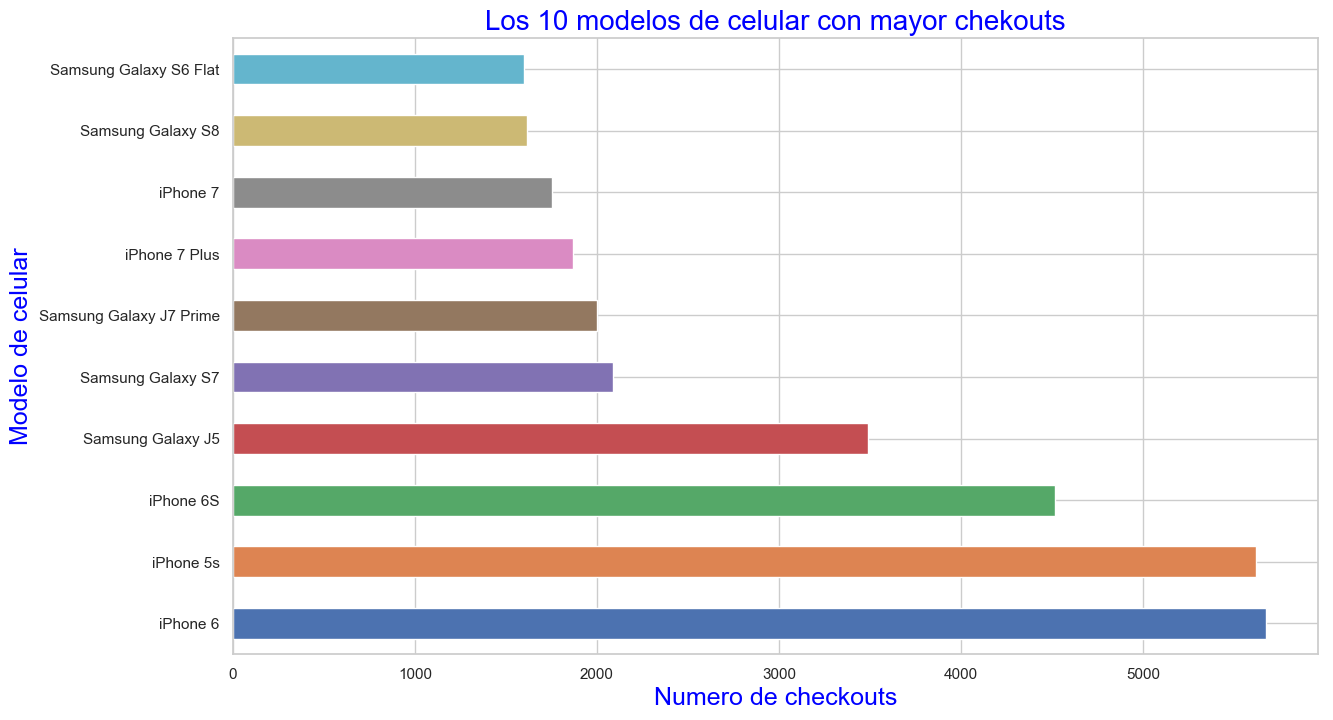

In [14]:
#Modelos con mas checkouts
modelsData = trocafoneData[trocafoneData['model'] != 'Nan']
modelsData = modelsData[modelsData['event'] == 'checkout']
modelsPlot = modelsData['model'].value_counts().head(10).plot(kind = 'barh',figsize =(14,8));
modelsPlot.set_title('Los 10 modelos de celular con mayor chekouts', fontsize = 20, color = 'blue')
modelsPlot.set_xlabel('Numero de checkouts', color = 'blue', fontsize = 18)
modelsPlot.set_ylabel('Modelo de celular', color = 'blue', fontsize = 18);

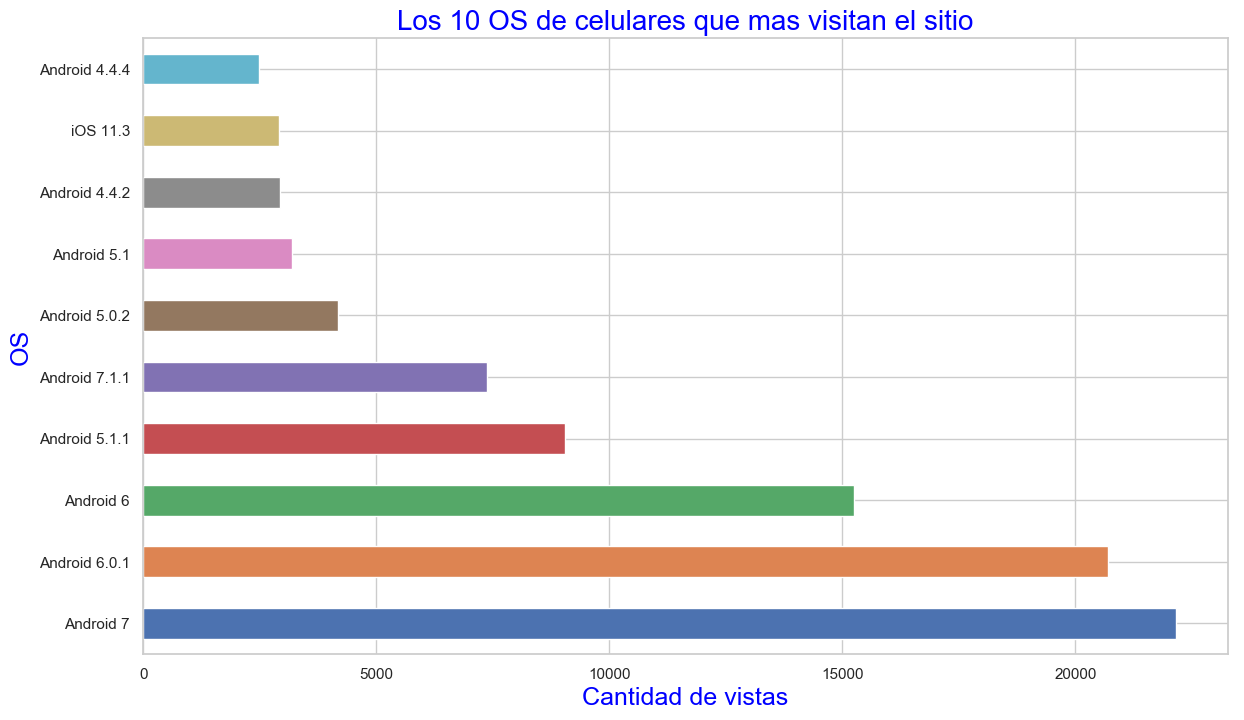

In [15]:
#Sistemas operativos que mas se visitan
osData = trocafoneData[trocafoneData['operating_system_version'] != 'Nan']
osData = osData[osData['event'] == 'visited site']
osData = osData[osData['device_type'] == 'Smartphone']
osData_plot = osData['operating_system_version'].value_counts().head(10).plot(kind = 'barh',figsize =(14,8));
osData_plot.set_title('Los 10 OS de celulares que mas visitan el sitio', fontsize = 20, color = 'blue')
osData_plot.set_xlabel('Cantidad de vistas', color = 'blue', fontsize = 18)
osData_plot.set_ylabel('OS', color = 'blue', fontsize = 18);

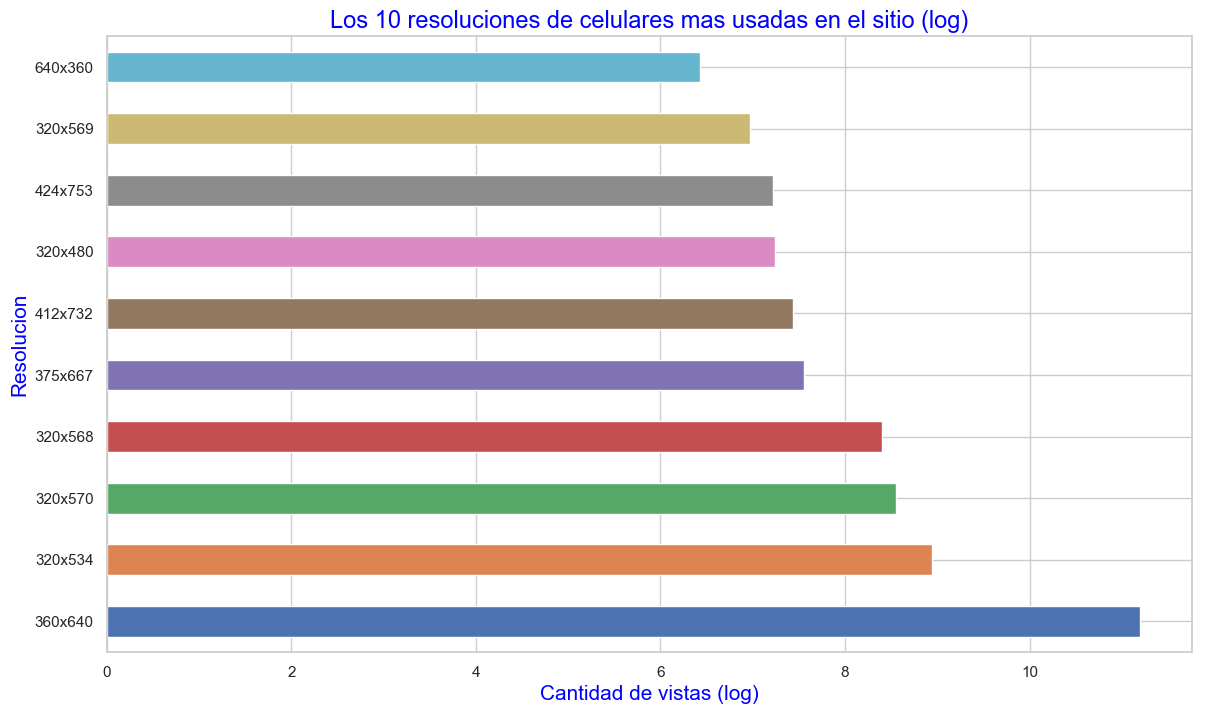

In [16]:
#Resoluciones que mas se visitan
screen_resolution = trocafoneData[trocafoneData['screen_resolution'] != 'Nan']
screen_resolution = screen_resolution[screen_resolution['event'] == 'visited site']
screen_resolution = screen_resolution[screen_resolution['device_type'] == 'Smartphone']
screen_resolution_plot = np.log(screen_resolution['screen_resolution'].value_counts()).head(10).plot(kind = 'barh', figsize =(14,8));
screen_resolution_plot.set_title('Los 10 resoluciones de celulares mas usadas en el sitio (log)', fontsize = 17, color = 'blue')
screen_resolution_plot.set_xlabel('Cantidad de vistas (log)', color = 'blue', fontsize = 15)
screen_resolution_plot.set_ylabel('Resolucion', color = 'blue', fontsize = 15);

**RARO QUE LA MAS VISTA SEA UNA RESOLUCION TAN BAJA. Y EN GENERAL APARECEN TODAS MUY BAJAS**

In [17]:
trocafoneData[trocafoneData['event'] == 'visited site']['model'].value_counts()

Series([], Name: model, dtype: int64)

**QUERIA HACER UNA COMPARATIVA CON LOS MODELOS MAS VISTOS, LAS RESOLUCIONES Y LOS OS MAS VISTOS PERO NO
NO HAY DATOS DE MODELOS EN EL EVENTO 'VISITED SITE'**

In [18]:
trocafoneData[trocafoneData['event'] != 'visited site']['operating_system_version'].value_counts()

Series([], Name: operating_system_version, dtype: int64)

**SOLO HAY DATOS DE LOS OS EN EL EVENTO 'VISITED SITE'**

In [19]:
trocafoneData[trocafoneData['event'] != 'visited site']['screen_resolution'].value_counts()

Series([], Name: screen_resolution, dtype: int64)

**SOLO HAY DATOS DE RESOLUCIONES EN EL EVENTO 'VISITED SITE'**

In [20]:
#Chequeo de elementos nulos en la columna de los eventos
trocafoneData['event'].isnull().any()

False

In [21]:
(trocafoneData['event'].value_counts()*100)/trocafoneData['event'].value_counts().sum()

viewed product       53.300343
brand listing         9.237467
visited site          8.714637
ad campaign hit       8.173103
generic listing       6.840214
searched products     5.577873
search engine hit     4.544001
checkout              2.789236
staticpage            0.478332
conversion            0.302817
lead                  0.041978
Name: event, dtype: float64

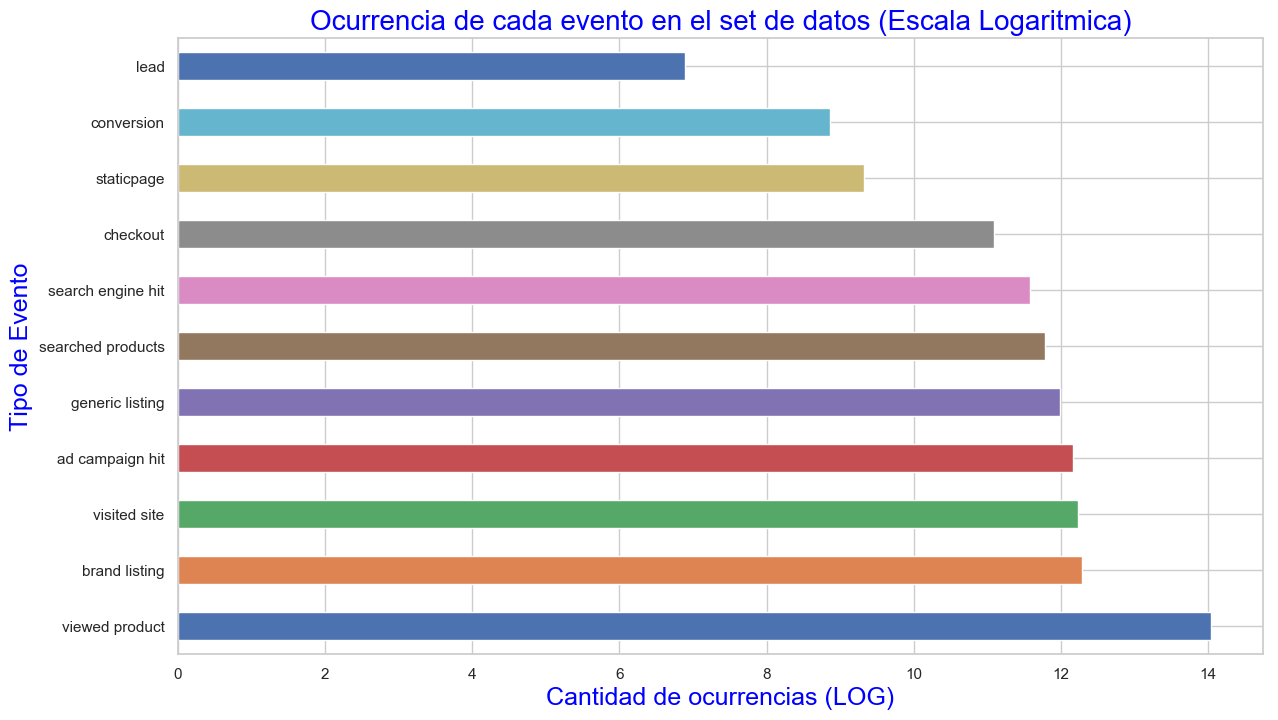

In [22]:
#Grafico
#eventos = ((trocafoneData['event'].value_counts()*100)/trocafoneData['event'].value_counts().sum()).plot(figsize=(14,8), kind='barh');
eventos = np.log(trocafoneData['event'].value_counts()).plot(figsize=(14,8), kind='barh')
eventos.set_title('Ocurrencia de cada evento en el set de datos (Escala Logaritmica)',fontsize = 20, color = 'blue');
eventos.set_xlabel('Cantidad de ocurrencias (LOG)', color = 'blue', fontsize = 18);
eventos.set_ylabel('Tipo de Evento', color = 'blue', fontsize = 18);

El evento predominante es "Viewed product", mas del 50% del total.

In [24]:
#Filtro filas con sku distinto de nulo y que tengan como evento 'conversion'
views = trocafoneData[(trocafoneData['event'] == 'viewed product')]
views.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,00:11:59
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,00:11:27
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,00:11:16
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,00:11:14
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,00:11:09


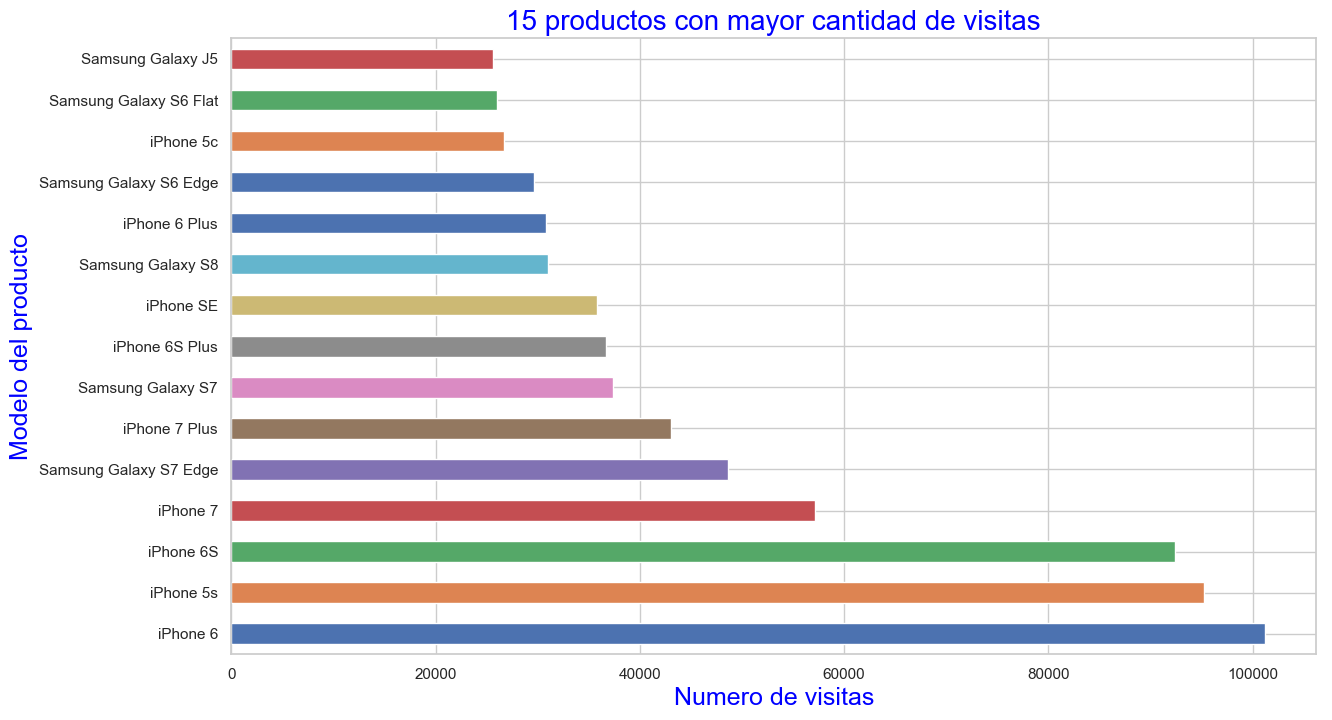

In [25]:
conv_plot = views['model'].value_counts().head(15).plot(figsize=(14,8), kind='barh')
conv_plot.set_title('15 productos con mayor cantidad de visitas', fontsize = 20, color = 'blue');
conv_plot.set_xlabel('Numero de visitas', color = 'blue', fontsize = 18);
conv_plot.set_ylabel('Modelo del producto', color = 'blue', fontsize = 18);

In [45]:
#Filtro filas con sku distinto de nulo y que tengan como evento 'conversion'
conversions = trocafoneData[(trocafoneData['event'] == 'conversion')]
conversions.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
195,2018-05-18 01:12:20,conversion,49c19e32,NaN,2683.0,iPhone 5c,Bom,16GB,Rosa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,01:12:20
234,2018-05-18 01:05:23,conversion,49c19e32,NaN,2683.0,iPhone 5c,Bom,16GB,Rosa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-18,01:05:23
724,2018-05-29 07:51:14,conversion,39df97e0,NaN,9358.0,Samsung Galaxy J2 Prime TV,Excelente,8GB,Rosa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29,07:51:14
744,2018-05-29 07:13:30,conversion,380c0e60,NaN,6314.0,Samsung Galaxy Note 5,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29,07:13:30
1198,2018-05-29 19:31:46,conversion,35ee0cc8,NaN,10924.0,Samsung Galaxy A5 2017,Bom,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29,19:31:46


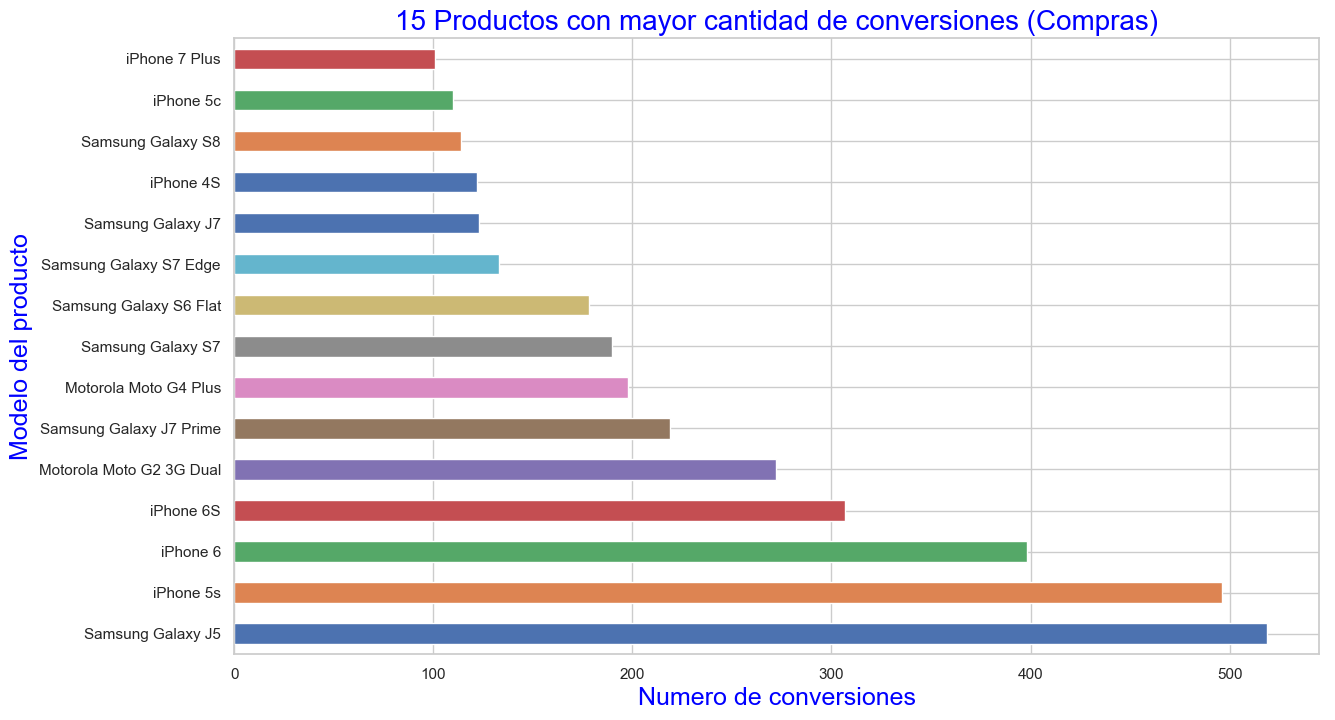

In [28]:
conv_plot = conversions['model'].value_counts().head(15).plot(figsize=(14,8), kind='barh')
conv_plot.set_title('15 Productos con mayor cantidad de conversiones (Compras)', fontsize = 20, color = 'blue');
conv_plot.set_xlabel('Numero de conversiones', color = 'blue', fontsize = 18);
conv_plot.set_ylabel('Modelo del producto', color = 'blue', fontsize = 18);

In [34]:
visitas_conversions = trocafoneData[(trocafoneData['event'] == 'viewed product')]['model'].value_counts().head(15)
conversions_comp = trocafoneData[(trocafoneData['event'] == 'conversion') & (trocafoneData['model'].isin(visitas_conversions.index))]
values_conv = conversions_comp['model'].value_counts().rename_axis('model').reset_index(name='conversions')
visitas_conversions = visitas_conversions.rename_axis('model').reset_index(name='views')
visitas_conversions = pd.merge(visitas_conversions, values_conv, on='model', how='inner')
visitas_conversions['views'] = visitas_conversions['views'] / 1000
visitas_conversions

,model,views,conversions
0,iPhone 6,101.161,398
1,iPhone 5s,95.274,496
2,iPhone 6S,92.357,307
3,iPhone 7,57.138,87
4,Samsung Galaxy S7 Edge,48.605,133
5,iPhone 7 Plus,43.079,101
6,Samsung Galaxy S7,37.333,190
7,iPhone 6S Plus,36.724,61
8,iPhone SE,35.828,74
9,Samsung Galaxy S8,30.999,114


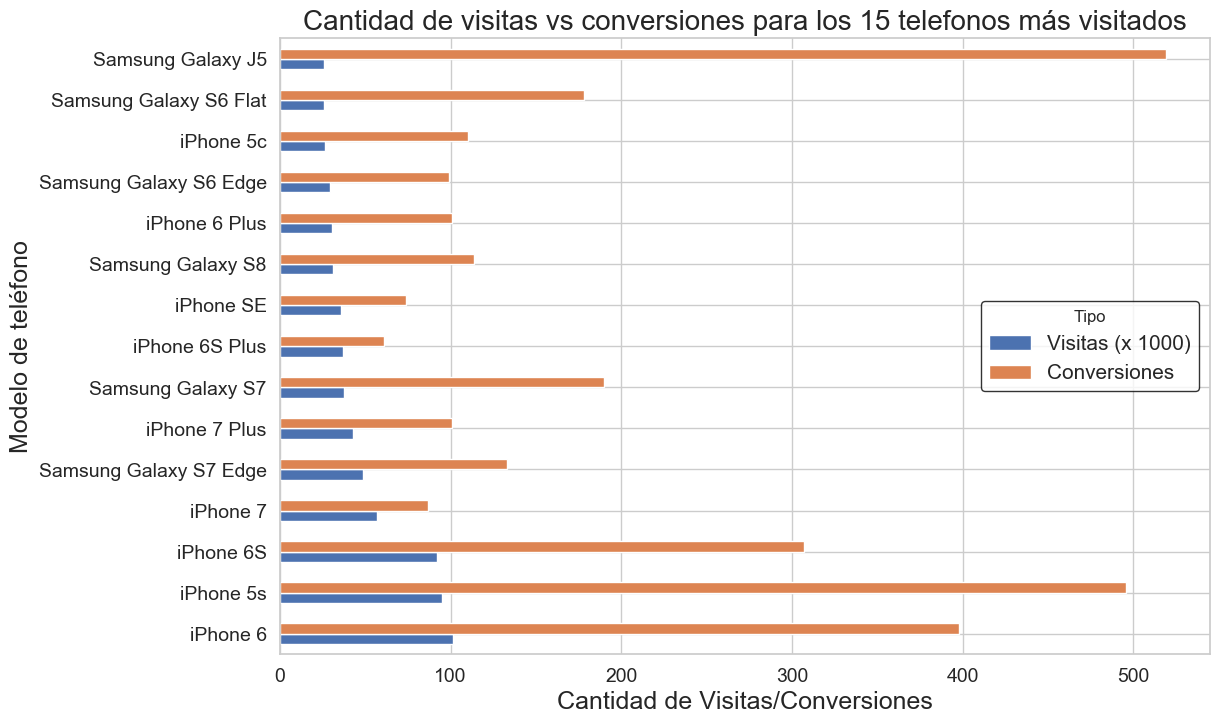

In [35]:
visita_compra_plot=visitas_conversions.plot(kind='barh',x='model',fontsize=14,figsize=(12,8),rot=0)
visita_compra_plot.set_title("Cantidad de visitas vs conversiones para los 15 telefonos más visitados",fontsize=20)
visita_compra_plot.set_xlabel("Cantidad de Visitas/Conversiones",fontsize=18)
visita_compra_plot.set_ylabel("Modelo de teléfono",fontsize=18)
leyenda=plt.legend(['Visitas (x 1000)','Conversiones'],fontsize=15,title='Tipo',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

In [36]:
data_location = trocafoneData
data_location = data_location[data_location['city'].notnull()]
data_location = data_location[data_location['city']!='Unknown']
personas = data_location.groupby('person').first().reset_index()
location_personas = personas[['person','city','region','country']]

In [37]:
conversion_citys = pd.merge(conversions,location_personas,left_on='person',right_on='person',how='inner').drop(columns=['city_x', 'region_x','country_x']).rename(columns={'city_y': 'city', 'region_y': 'region', 'country_y': 'country'})

In [38]:
conversion_by_region = conversion_citys.groupby(['model','region']).size().unstack(fill_value=0)
conversion_by_region = conversion_by_region.loc[(conversion_by_region>5).any(1), (conversion_by_region>5).any(0)]

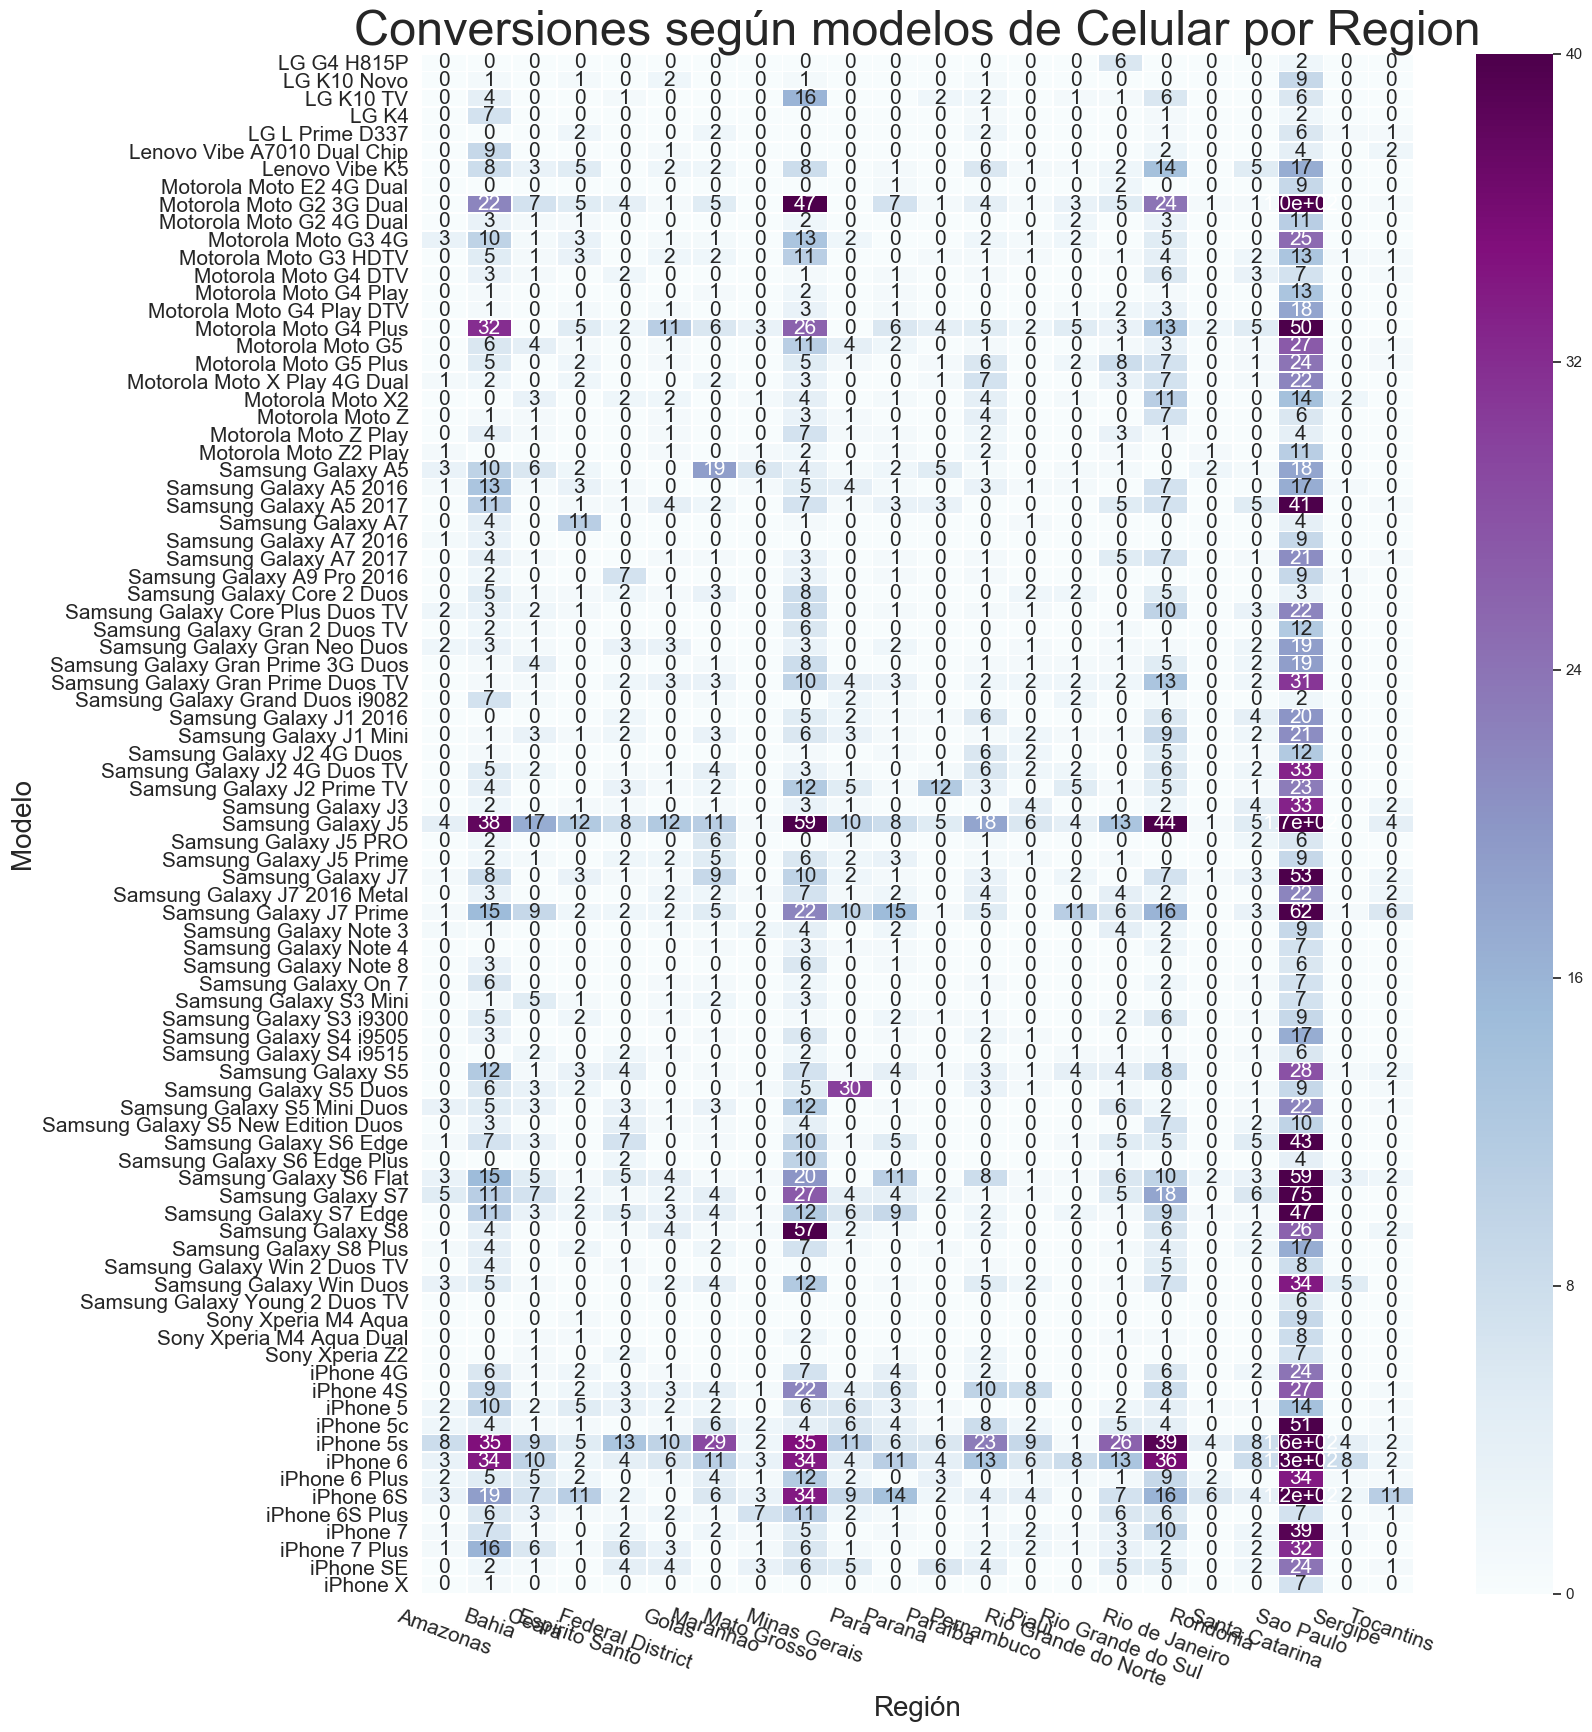

In [40]:
plt.figure(figsize = (16,20))
conversion_by_region_heatMap = sbn.heatmap(conversion_by_region,vmin=0,vmax=40, cmap='BuPu', linewidths=0.5,annot=True, annot_kws={"size": 15})
conversion_by_region_heatMap.set_ylabel("Modelo", fontsize = 20)
conversion_by_region_heatMap.set_xlabel("Región", fontsize = 20)
conversion_by_region_heatMap.set_title("Conversiones según modelos de Celular por Region", fontsize = 35)
conversion_by_region_heatMap.tick_params(axis='both', labelsize=15)
conversion_by_region_heatMap.set_xticklabels(labels = conversion_by_region.columns.values, rotation=-20);

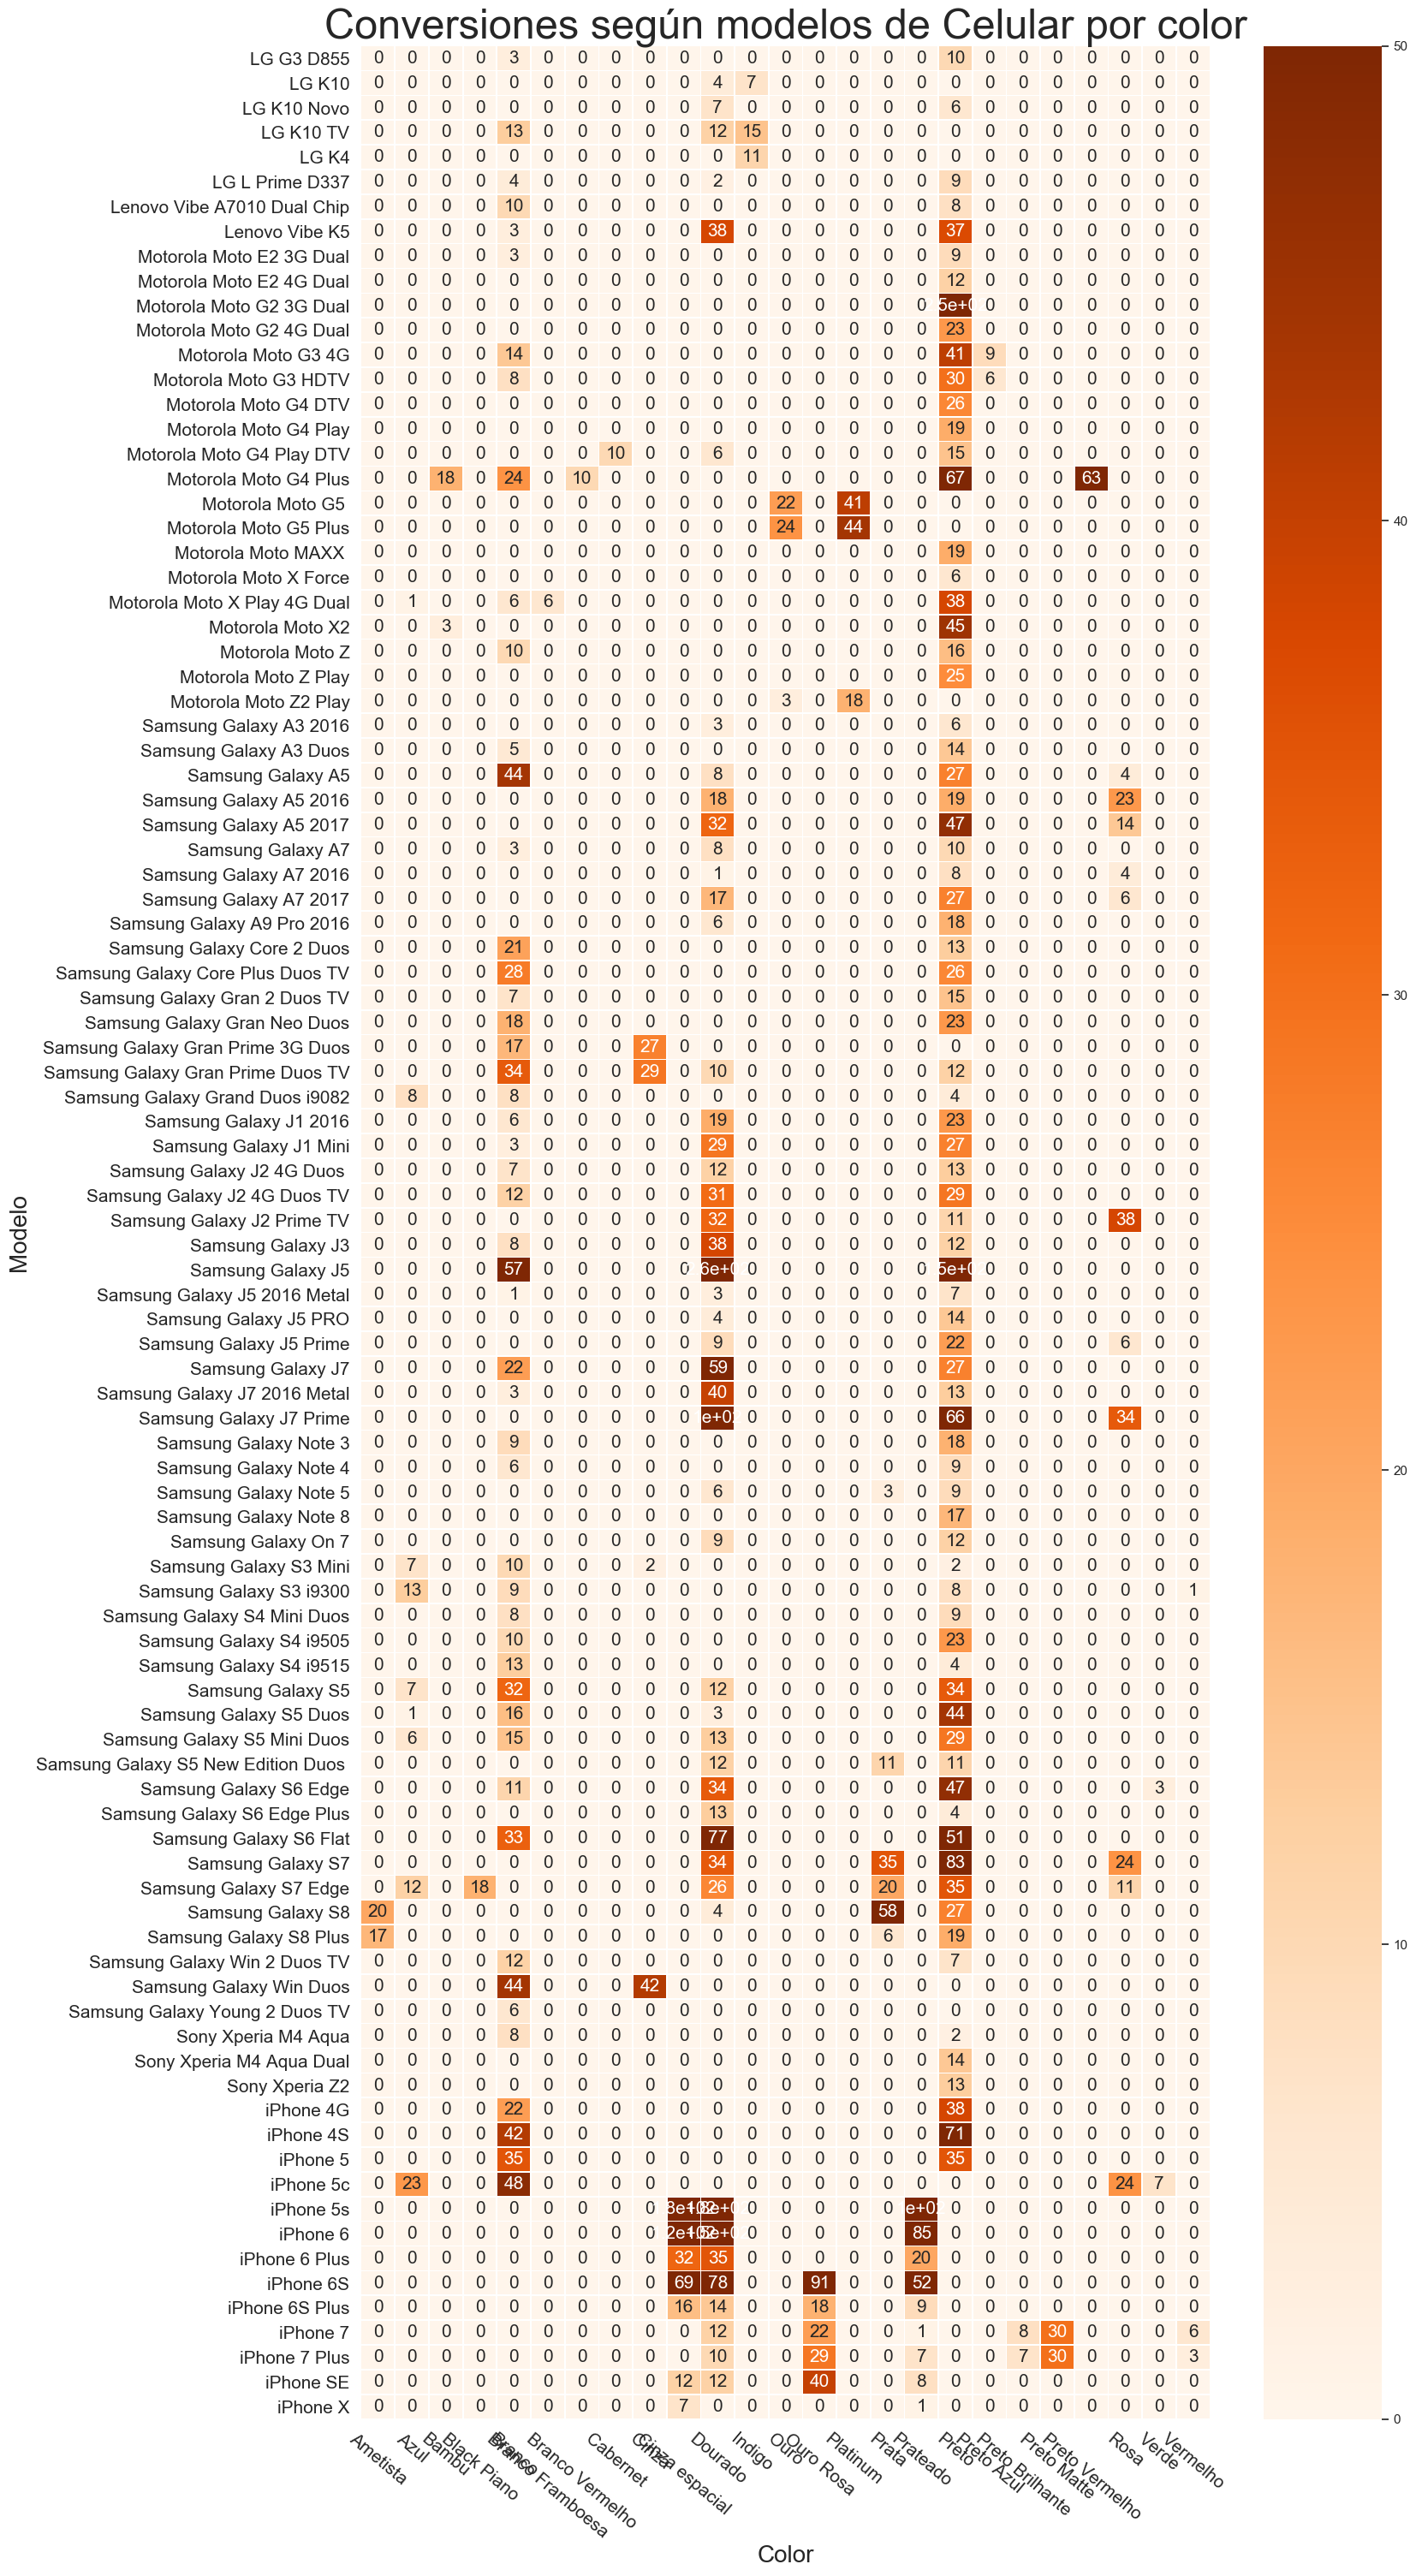

In [52]:
plt.figure(figsize = (16,36))
conversion_by_model_color = conversion_citys.groupby(['model','color']).size().unstack(fill_value=0)
conversion_by_model_color = conversion_by_model_color.loc[(conversion_by_model_color>5).any(1), (conversion_by_model_color>5).any(0)]
conversion_by_model_color_heatMap = sbn.heatmap(conversion_by_model_color,vmin=0,vmax=50, cmap='Oranges', linewidths=0.5,annot=True, annot_kws={"size": 15} )
conversion_by_model_color_heatMap.set_ylabel("Modelo", fontsize = 20)
conversion_by_model_color_heatMap.set_xlabel("Color", fontsize = 20)
conversion_by_model_color_heatMap.set_title("Conversiones según modelos de Celular por color", fontsize = 35)
conversion_by_model_color_heatMap.tick_params(axis='both', labelsize=15)
conversion_by_model_color_heatMap.set_xticklabels(labels = conversion_by_model_color.columns.values, rotation=-40);

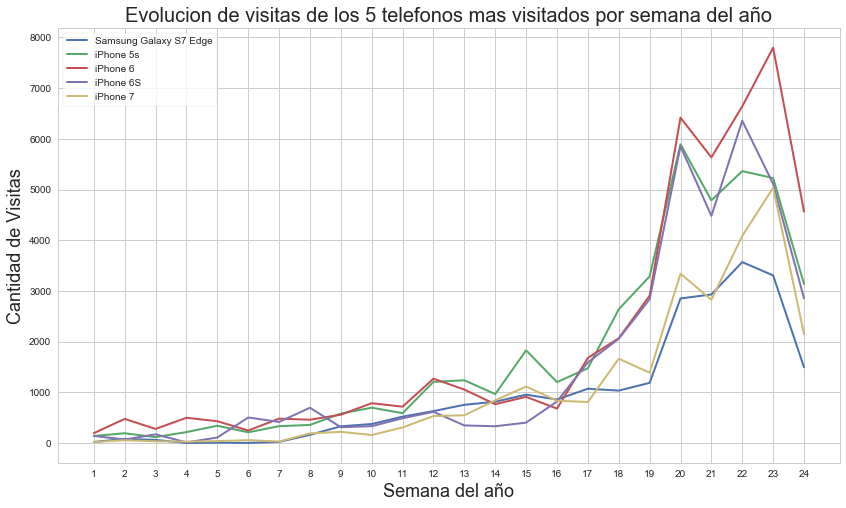

In [31]:
aux1 = views.copy()
aux1["week"] = pd.to_datetime(aux1['timestamp'], format="%Y-%m-%d %H:%M:%S").dt.week
views_by_model_week = aux1.groupby(['week','model']).size().unstack(fill_value=0)
views_by_model_week = views_by_model_week.loc[(views_by_model_week>1).any(1), (views_by_model_week>3500).any(0)]
views_by_model_week.plot(linewidth=2,figsize = (14,8))
plt.title('Evolucion de visitas de los 5 telefonos mas visitados por semana del año', fontsize=20)
plt.xlabel('Semana del año', fontsize = 18)
plt.xticks(range(1, 25, 1))
plt.ylabel('Cantidad de Visitas', fontsize = 18)
plt.legend(loc='upper left', frameon=True)
plt.show();

In [74]:
campanias = trocafoneData[(trocafoneData["url"].notnull()) & (trocafoneData["timestamp"]>='2018-06-04') & (trocafoneData["timestamp"]<'2018-06-11') ]
trocafoneData[trocafoneData["url"]=='/comprar/iphone/6'].sort_values(by='timestamp').head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
206141,2018-01-03 23:17:26,ad campaign hit,368946df,/comprar/iphone/6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-03,23:17:26
206146,2018-01-03 23:17:54,ad campaign hit,368946df,/comprar/iphone/6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-03,23:17:54
665846,2018-01-04 02:26:12,ad campaign hit,aa7bf42d,/comprar/iphone/6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-04,02:26:12
665850,2018-01-04 10:54:16,ad campaign hit,aa7bf42d,/comprar/iphone/6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-04,10:54:16
808463,2018-01-04 16:41:30,ad campaign hit,ce5f5942,/comprar/iphone/6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-04,16:41:30


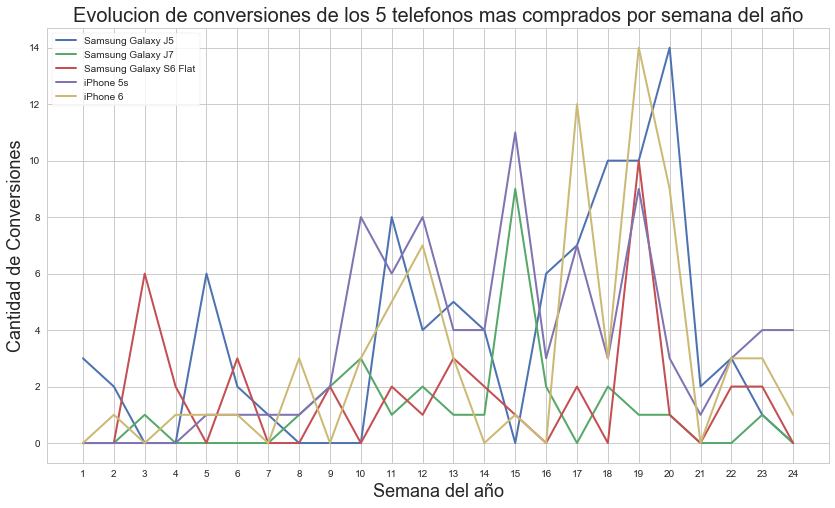

In [53]:
aux1 = conversions.copy()
aux1["week"] = pd.to_datetime(aux1['timestamp'], format="%Y-%m-%d %H:%M:%S").dt.week
conversion_by_model_week = aux1.groupby(['week','model']).size().unstack(fill_value=0)
conversion_by_model_week = conversion_by_model_week.loc[(conversion_by_model_week>1).any(1), (conversion_by_model_week>8).any(0)]
conversion_by_model_week.plot(linewidth=2,figsize = (14,8))
plt.title('Evolucion de conversiones de los 5 telefonos mas comprados por semana del año', fontsize=20)
plt.xlabel('Semana del año', fontsize = 18)
plt.xticks(range(1, 25, 1))
plt.ylabel('Cantidad de Conversiones', fontsize = 18)
plt.legend(loc='upper left', frameon=True)
plt.show();

In [33]:
trocafoneData['event'].drop_duplicates()

0         ad campaign hit
1            visited site
2          viewed product
3                checkout
8         generic listing
10      search engine hit
12          brand listing
157     searched products
220            conversion
254            staticpage
3248                 lead
Name: event, dtype: object

In [34]:
df=trocafoneData

In [35]:
df[df['event'] == 'checkout'].head(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31,23:38:40


In [36]:
df[df['event'] == 'conversion'].head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
220,2018-03-20 17:46:12,conversion,00204059,NaN,3084.0,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-20,17:46:12
2282,2018-04-26 22:28:53,conversion,00c13dee,NaN,6650.0,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-26,22:28:53
2547,2018-06-10 14:37:50,conversion,00fdbb4b,NaN,3348.0,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-10,14:37:50
4245,2018-03-16 13:50:25,conversion,0146a9df,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-16,13:50:25
6985,2018-02-09 22:07:07,conversion,01db2fe6,NaN,6357.0,Samsung Galaxy J5,Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-09,22:07:07


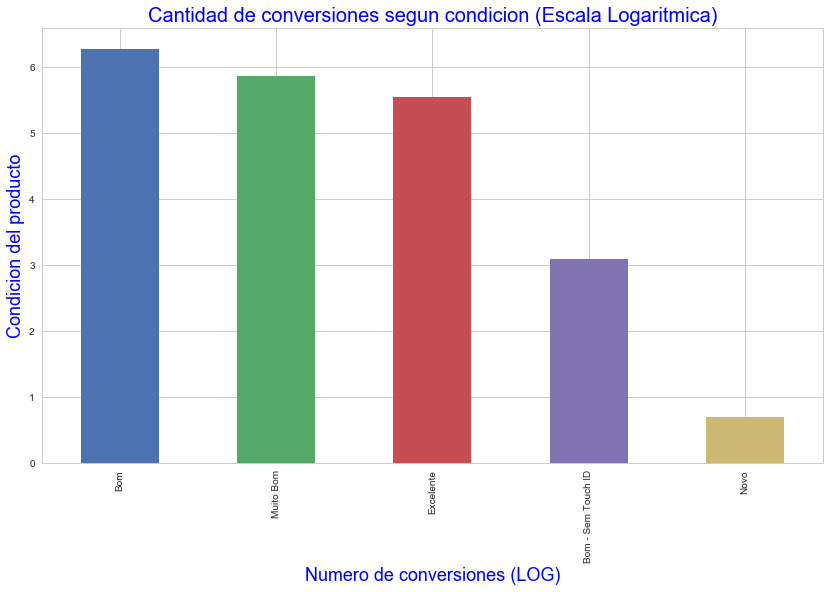

In [37]:
conv_plot = np.log(conversions['condition'].value_counts()).plot(figsize=(14,8), kind='bar')
conv_plot.set_title('Cantidad de conversiones segun condicion (Escala Logaritmica)', fontsize = 20, color = 'blue');
conv_plot.set_xlabel('Numero de conversiones (LOG)', color = 'blue', fontsize = 18);
conv_plot.set_ylabel('Condicion del producto', color = 'blue', fontsize = 18);

## Estudio segun los usuarios

In [38]:
#Chequeo de elementos nulos en la columna de los usuarios
trocafoneData['person'].isnull().any()

False

In [39]:
trocafoneData['person'].value_counts().head(10)

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

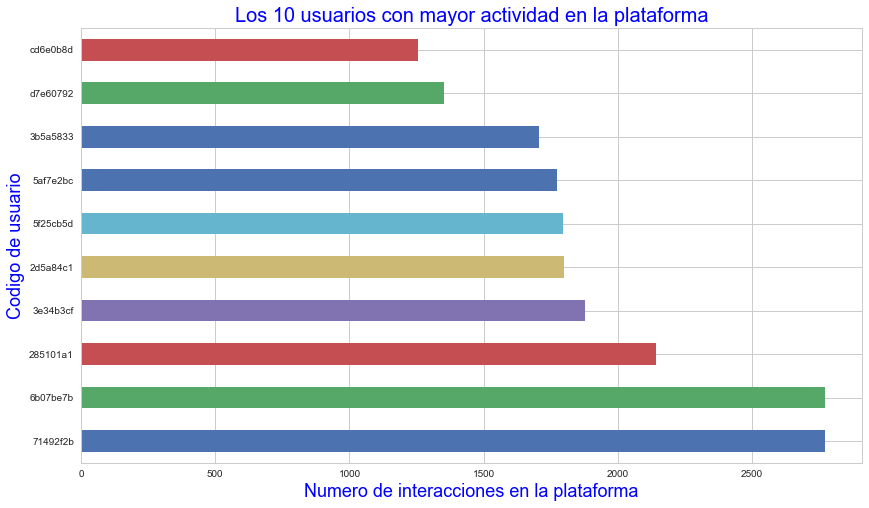

In [40]:
#Los 10 usuarios con mayor actividad en la plataforma
users = (trocafoneData['person'].value_counts().head(10)).plot(figsize=(14,8), kind='barh');
users.set_title('Los 10 usuarios con mayor actividad en la plataforma',fontsize = 20, color = 'blue');
users.set_xlabel('Numero de interacciones en la plataforma', color = 'blue', fontsize = 18);
users.set_ylabel('Codigo de usuario', color = 'blue', fontsize = 18);

## Estudio segun dias y meses

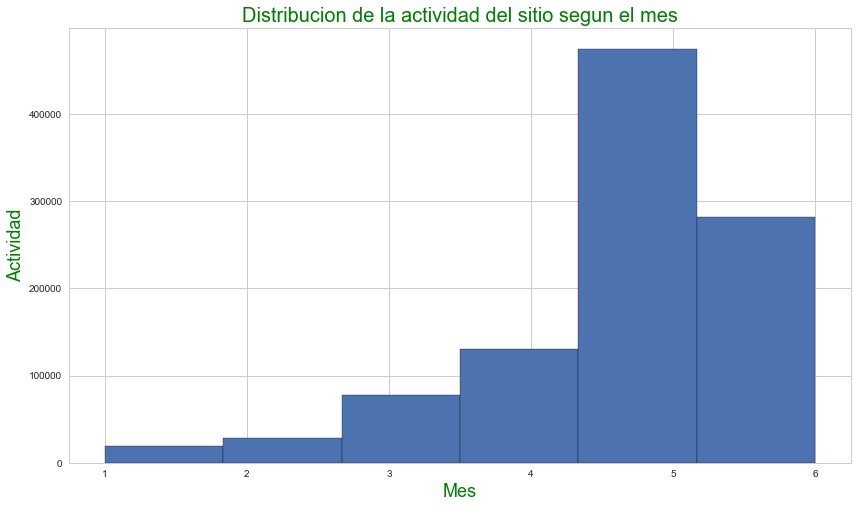

In [41]:
#Distribucion de la actidad del sitio segun el mes
monthPlot = pd.to_datetime(trocafoneData['date']).dt.month.hist(figsize = (14,8),bins = 6, edgecolor = 'black');
monthPlot.set_title('Distribucion de la actividad del sitio segun el mes', fontsize = 20, color = 'green')
monthPlot.set_xlabel('Mes', color = 'green', fontsize = 18)
monthPlot.set_ylabel('Actividad', color = 'green', fontsize = 18);

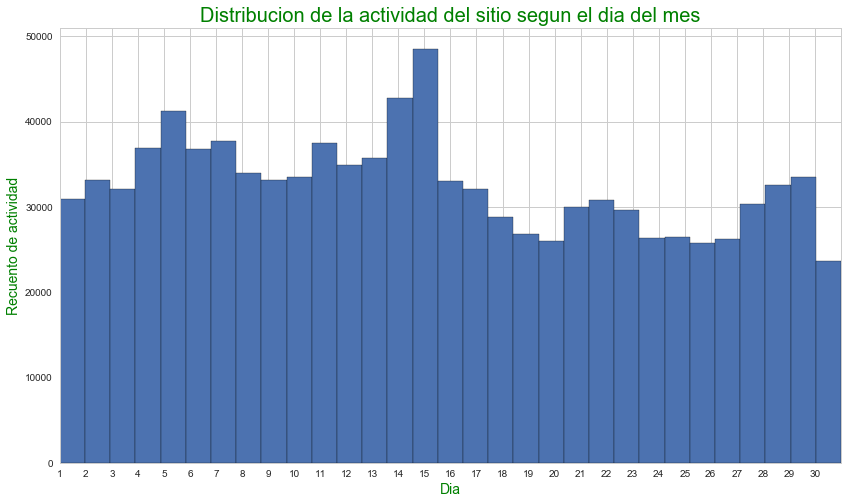

In [42]:
#Distribucion de la actidad del sitio segun el dia de la semana
fig = plt.figure()
daysPlot = fig.add_subplot(111)
plt.title('Distribucion de la actividad del sitio segun el dia del mes', fontsize = 20, color = 'green')

daysPlot.set_xlabel('Dia', color = 'green', fontsize = 14)

pd.to_datetime(trocafoneData['date']).dt.day.hist(figsize=(14,8), bins = 31, edgecolor = 'black')

daysPlot.set_ylabel('Recuento de actividad', color = 'green', fontsize = 14)
daysPlot.set_xlim(1, 31 )
daysPlot.set_xticks(range(1, 31, 1))
plt.show()

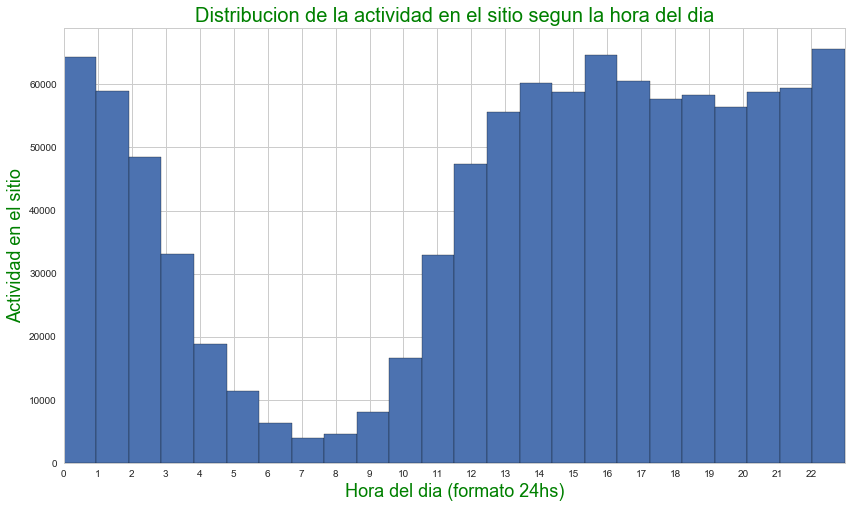

In [43]:
#Distribucion de la actidad del sitio segun la hora del dia
hoursPlot = pd.to_datetime(trocafoneData['timestamp']).dt.hour.hist(figsize=(14,8), bins = 24, edgecolor = 'black')
hoursPlot.set_title('Distribucion de la actividad en el sitio segun la hora del dia',fontsize = 20, color = 'green')
hoursPlot.set_xlabel('Hora del dia (formato 24hs)', fontsize = 18 , color = 'green')
hoursPlot.set_ylabel('Actividad en el sitio', fontsize = 18 , color = 'green')
hoursPlot.set_xlim(0, 23 )
hoursPlot.set_xticks(range(0, 23, 1));

## Estudio segun los paises

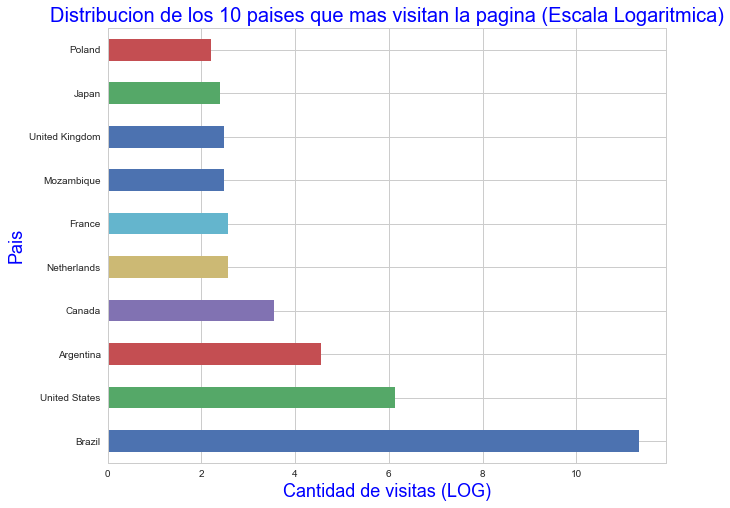

In [44]:
country_visitSite = trocafoneData[trocafoneData['event'] == 'visited site']
country_visitSite = country_visitSite[country_visitSite['country'] != 'Unknown']
plt.title('Distribucion de los 10 paises que mas visitan la pagina (Escala Logaritmica)', fontsize = 20, color ='Blue')
plt.xlabel('Cantidad de visitas (LOG)',fontsize = 18, color = 'Blue')
plt.ylabel('Pais',fontsize = 18, color = 'Blue')
np.log(country_visitSite['country'].value_counts()).head(10).plot(figsize = (10,8), kind='barh');

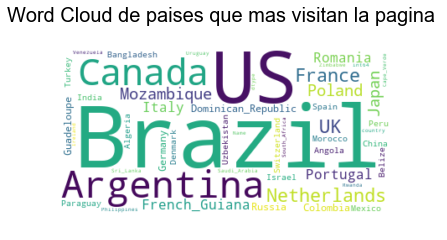

In [45]:
country_visitSite = trocafoneData[trocafoneData['event'] == 'visited site']
country_visitSite = country_visitSite[country_visitSite['country'] != 'Unknown']
country_visitSite.replace({'country': {"United Kingdom": "UK", "United States": "US","South Africa": "South_Africa",
                                       "Saudi Arabia" : "Saudi_Arabia","Sri Lanka":"Sri_Lanka","Cape Verde" : "Cape_Verde",
                                      "Dominican Republic" : "Dominican_Republic", "French Guiana" : "French_Guiana "}},  
                                      inplace = True)
countries = country_visitSite['country'].value_counts()

wordcloud = WordCloud(background_color='white',mode = 'RGBA',margin = 5).generate(str(countries))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud de paises que mas visitan la pagina \n', fontsize=20, color = 'black');
plt.show()



In [46]:
trocafoneData['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [47]:
checkout = trocafoneData[trocafoneData['event'] == 'checkout']
checkout['country'].value_counts()

Series([], Name: country, dtype: int64)

No hay datos de paises para el evento 'checkout'

In [48]:
viewed_product = trocafoneData[trocafoneData['event'] == 'viewed product']
viewed_product['country'].value_counts()

Series([], Name: country, dtype: int64)

No hay datos de paises para el evento 'viewed product'

In [49]:
searched_products = trocafoneData[trocafoneData['event'] == 'searched products']
searched_products['country'].value_counts()

Series([], Name: country, dtype: int64)

No hay datos de paises para el evento 'searched products'

In [50]:
conversion = trocafoneData[trocafoneData['event'] == 'conversion']
conversion['country'].value_counts()

Series([], Name: country, dtype: int64)

No hay datos de paises para el evento 'conversion'

In [51]:
trocafoneData[trocafoneData['event'] != 'visited site']['country'].value_counts()

Series([], Name: country, dtype: int64)

**NO HAY DATOS DE PAISES EN NINGUN EVENTO QUE NO SEA 'VISITED SITE'**

In [52]:
trocafoneData[trocafoneData['model'] != 'NaN']['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
France                   13
Netherlands              13
United Kingdom           12
Mozambique               12
Japan                    11
Poland                    9
French Guiana             8
Portugal                  7
Romania                   7
Italy                     7
Dominican Republic        6
Russia                    6
Guadeloupe                6
Germany                   5
Colombia                  4
Paraguay                  4
Bangladesh                4
Switzerland               3
Angola                    2
Morocco                   2
India                     2
Peru                      1
Belize                    1
Venezuela                 1
Denmark                   1
Sri Lanka                 1
Uruguay                   1
China                     1
Israel                    1
Spain                     1
Zimbabwe            

In [47]:
trocafoneData[trocafoneData['event'] == 'conversion']['color'].value_counts()

Preto               2318
Dourado             1719
Branco               908
Cinza espacial       498
Prateado             308
Ouro Rosa            218
Rosa                 205
Prata                148
Cinza                124
Platinum             115
Azul                  85
Preto Matte           70
Preto Vermelho        67
Ouro                  49
Indigo                41
Ametista              41
Bambu                 24
Black Piano           22
Titânio               19
Preto Brilhante       18
Preto Azul            17
Vermelho              13
Branco Vermelho       11
Cabernet              10
Verde                 10
Branco Framboesa       6
Branco Azul            6
Branco Pink            5
Azul Escuro            3
Branco Cabernet        3
Rose                   2
Ônix                   2
Azul Topázio           1
Preto Verde            1
Branco Dourado         1
Roxo                   1
Amarelo                1
Branco Azul Navy       1
Name: color, dtype: int64

In [49]:
conversion_citys['color'].value_counts()

Preto               2111
Dourado             1560
Branco               826
Cinza espacial       449
Prateado             287
Ouro Rosa            202
Rosa                 188
Prata                136
Cinza                116
Platinum             110
Azul                  79
Preto Vermelho        63
Preto Matte           60
Ouro                  49
Indigo                37
Ametista              37
Bambu                 21
Titânio               19
Black Piano           18
Preto Azul            15
Preto Brilhante       15
Vermelho              13
Branco Vermelho       10
Cabernet              10
Verde                 10
Branco Framboesa       6
Branco Azul            6
Azul Escuro            3
Branco Pink            3
Rose                   2
Ônix                   2
Branco Cabernet        2
Azul Topázio           1
Preto Verde            1
Branco Dourado         1
Roxo                   1
Amarelo                1
Branco Azul Navy       1
Name: color, dtype: int64